In [23]:
import os
os.chdir("/Users/nickl/Documents/College/DATA 481 - Gene Data")

In [24]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold


In [25]:
#loading filtered gene expression dataset with 2000 genes
df = pd.read_csv("filtered_gene_expression.csv")
df.shape

(783, 2001)

In [26]:
df.head()

,Unnamed: 0,ENSG00000110484,ENSG00000173467,ENSG00000160180,ENSG00000106541,ENSG00000086548,ENSG00000186081,ENSG00000164128,ENSG00000082175,ENSG00000012223,...,ENSG00000183579,ENSG00000111640,ENSG00000141582,ENSG00000083444,ENSG00000077238,ENSG00000131378,ENSG00000162627,ENSG00000172428,ENSG00000090238,ENSG00000121310
0,TCGA-B6-A0IG-01A-11R-A034-07,16.604568,13.223057,16.503468,16.406028,16.432548,12.923043,6.321402,10.431743,12.610098,...,9.498140,16.407849,11.891926,13.235186,12.394746,9.942146,8.553333,11.502764,10.531759,10.892306
1,TCGA-BH-A0HQ-01A-11R-A034-07,17.999684,12.796037,15.401028,15.135256,10.963789,13.592751,9.657230,13.523402,13.761161,...,9.069928,15.914698,11.445023,13.502874,12.193215,11.164268,10.274965,10.937427,11.517999,12.172644
2,TCGA-BH-A18G-01A-11R-A12D-07,11.449702,3.660178,0.000000,5.166983,10.137522,10.144959,14.228891,5.449170,18.585784,...,9.609232,18.279752,10.998696,15.340948,12.148326,10.899602,10.838234,11.463646,12.285856,10.922859
3,TCGA-A8-A09K-01A-11R-A00Z-07,1.675843,13.126475,10.825054,12.800465,4.375425,7.437230,11.509252,9.890669,9.995210,...,12.416744,15.469124,13.226838,11.836395,9.202800,9.810061,10.297798,11.573526,12.778097,12.220035
4,TCGA-BH-A0BZ-01A-31R-A12P-07,8.222050,11.830127,12.560654,14.547573,9.016715,11.662777,9.213446,7.501901,7.631275,...,9.499313,16.135190,12.777781,13.686927,12.581818,11.524712,9.752092,10.692426,11.690135,10.532674


In [27]:
#loading meta dataset
metadf = pd.read_csv("metadata.csv")
metadf.shape 

(783, 7)

In [28]:
#Prepping df to merge with metadf
df.rename(columns={'Unnamed: 0': 'mRNA'}, inplace=True)
df = pd.merge(df, metadf, on =  "mRNA", how='left')
df.set_index("mRNA", inplace=True)
df.shape

(783, 2006)

In [29]:
#Dropping the 20 outliers Minji found using PCs 3 and 4
NoOutdf =  df.drop(['TCGA-06-0211-01B-01R-1849-01', 'TCGA-06-0211-02A-02R-2005-01',
       'TCGA-06-0130-01A-01R-1849-01', 'TCGA-06-0132-01A-02R-1849-01',
       'TCGA-16-1045-01B-01R-1850-01', 'TCGA-06-0125-01A-01R-1849-01',
       'TCGA-06-0125-02A-11R-2005-01', 'TCGA-06-0139-01A-01R-1849-01',
       'TCGA-26-5132-01A-01R-1850-01', 'TCGA-15-1444-01A-02R-1850-01',
       'TCGA-32-2616-01A-01R-1850-01', 'TCGA-06-0750-01A-01R-1849-01',
       'TCGA-41-2572-01A-01R-1850-01', 'TCGA-06-0138-01A-02R-1849-01',
       'TCGA-06-0211-01A-01R-1849-01', 'TCGA-06-0178-01A-01R-1849-01',
       'TCGA-28-2499-01A-01R-1850-01', 'TCGA-06-1804-01A-01R-1849-01',
       'TCGA-26-1442-01A-01R-1850-01', 'TCGA-28-1747-01C-01R-1850-01'], inplace = False)
NoOutdf.shape

(763, 2006)

In [30]:
NoOutdf.to_csv("NoOutliers_filtered_gene_expression.csv")

In [31]:
#setting up x and y for PCA
df = df.dropna(subset=["ER"])

X = df.drop(columns=["PAM50", "TumorPurity", "ProliferationScore", "ER", "PR", "HER2"]) 
y1 = df["ER"] 

X.shape


(672, 2000)

In [32]:
#Finding top 50 PCs and splitting into training and test sets
pca = PCA(n_components=50, random_state = 42)
X_pca1 = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_pca1, y1, test_size=0.2, random_state=42)

In [33]:
#Setting up model and fitting it
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict on test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9185


In [34]:
#Running Cross Validation on logreg
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(log_reg, X_pca1, y1, cv=cv, scoring='accuracy')

print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean():.4f}")


Cross-validation accuracy scores: [0.91111111 0.91111111 0.92537313 0.90298507 0.91044776]
Mean accuracy: 0.9122


PCA + Logistic Regression on Filtered Gene Expression with Outliers Removed

In [35]:
#setting up x and y for PCA
NoOutdf= NoOutdf.dropna(subset=["ER"])

X = NoOutdf.drop(columns=["PAM50", "TumorPurity", "ProliferationScore", "ER", "PR", "HER2"]) 
y = NoOutdf["ER"] 

X.shape


(652, 2000)

In [36]:
#Finding top 50 PCs and splitting into training and test sets
pca = PCA(n_components=6, random_state = 42)
X_pca = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [37]:
#Setting up model and fitting it
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict on test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9389


In [38]:
#Running Cross Validation on logreg
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(log_reg, X_pca, y, cv=cv, scoring='accuracy')

print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean():.4f}")


Cross-validation accuracy scores: [0.9389313  0.90839695 0.93846154 0.96153846 0.98461538]
Mean accuracy: 0.9464


Running Cross Validation using Minji's 5-Fold Split with outliers removed

In [39]:
from sklearn.model_selection import cross_val_score, PredefinedSplit

In [40]:
#loading datasets
splitdf = pd.read_csv("metadata_randomGroup.csv")
df = pd.read_csv("filtered_gene_expression.csv")
df.rename(columns={'Unnamed: 0': 'mRNA'}, inplace=True)
df.head()
fulldf = pd.merge(df, splitdf, on =  "mRNA", how='left')
fulldf.set_index("mRNA", inplace=True)
#Removing all outliers from dataframe
fulldf = fulldf[fulldf["Group"] != 6]
fulldf =  fulldf.drop(['TCGA-06-0211-01B-01R-1849-01', 'TCGA-06-0211-02A-02R-2005-01',
       'TCGA-06-0130-01A-01R-1849-01', 'TCGA-06-0132-01A-02R-1849-01',
       'TCGA-16-1045-01B-01R-1850-01', 'TCGA-06-0125-01A-01R-1849-01',
       'TCGA-06-0125-02A-11R-2005-01', 'TCGA-06-0139-01A-01R-1849-01',
       'TCGA-26-5132-01A-01R-1850-01', 'TCGA-15-1444-01A-02R-1850-01',
       'TCGA-32-2616-01A-01R-1850-01', 'TCGA-06-0750-01A-01R-1849-01',
       'TCGA-41-2572-01A-01R-1850-01', 'TCGA-06-0138-01A-02R-1849-01',
       'TCGA-06-0211-01A-01R-1849-01', 'TCGA-06-0178-01A-01R-1849-01',
       'TCGA-28-2499-01A-01R-1850-01', 'TCGA-06-1804-01A-01R-1849-01',
       'TCGA-26-1442-01A-01R-1850-01', 'TCGA-28-1747-01C-01R-1850-01'], inplace = False)
#Making the group column zero index
fulldf["Group"] = fulldf["Group"] - 1
#Splitting data and setting up predefined split
group_indices = fulldf['Group'].values  
ps = PredefinedSplit(group_indices)
ps = PredefinedSplit(group_indices)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

cv_scores = cross_val_score(log_reg, X_pca, y, cv=ps, scoring='accuracy')

print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean():.4f}")


Cross-validation accuracy scores: [0.97101449 0.96666667 0.93478261 0.93478261 0.92372881]
Mean accuracy: 0.9462


In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

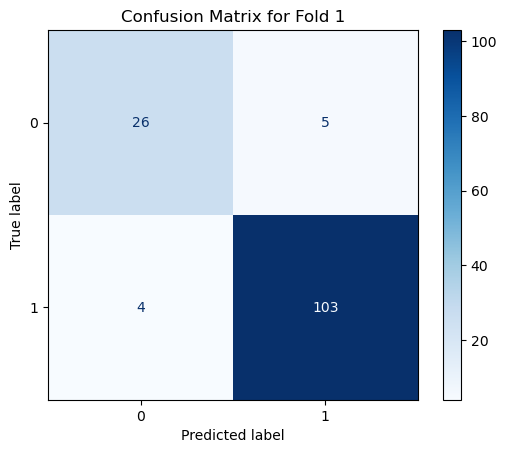

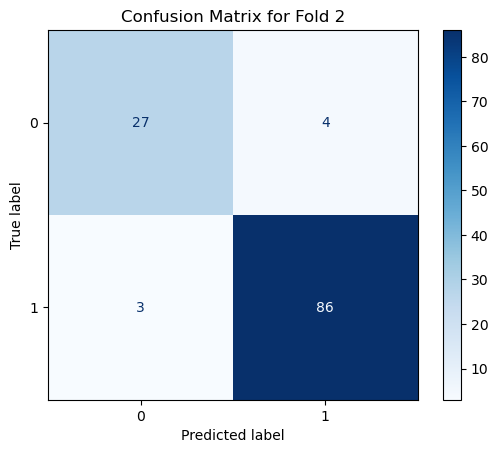

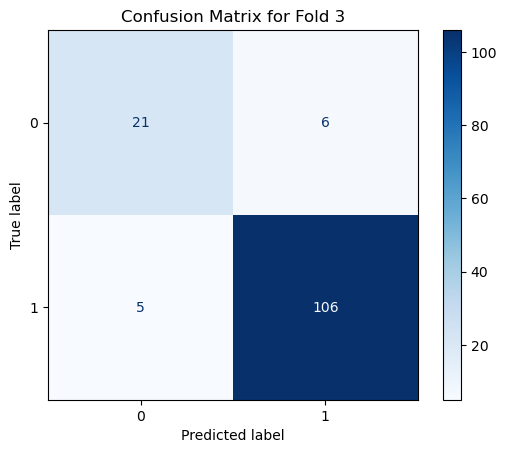

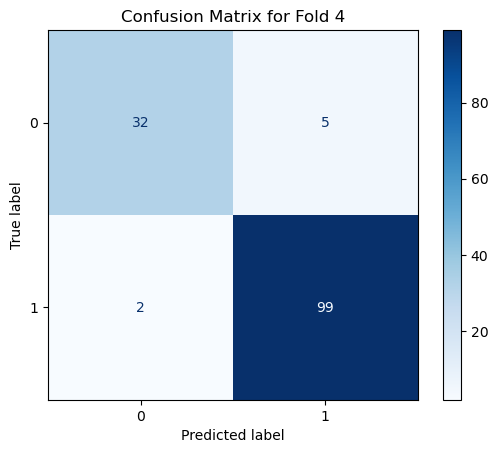

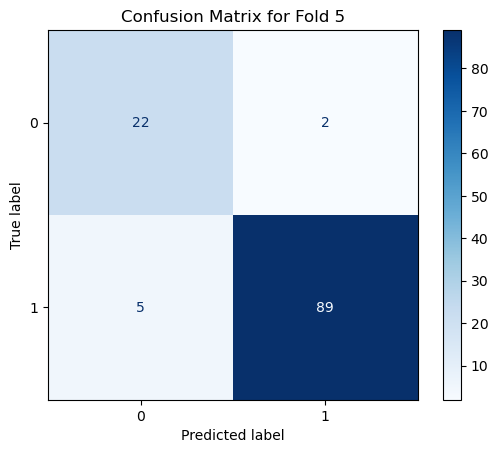

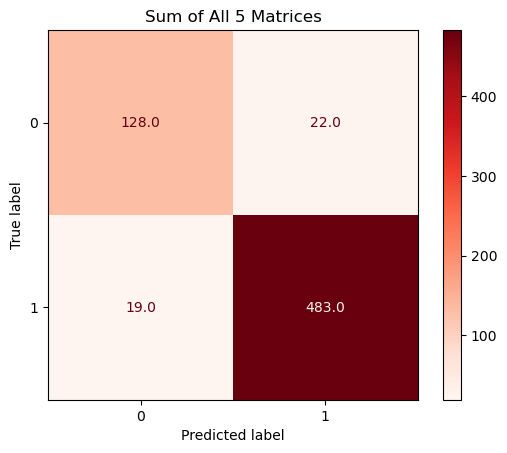

In [42]:
#Generating Confusion Matrices
#Creating Confusion Matrix
X = np.array(X)
y = np.array(y)
z = np.zeros((2,2))
for fold_idx, (train_idx, test_idx) in enumerate(ps.split(), 1):
    # Split data into train and test
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Train the model
    log_reg.fit(X_train, y_train)

    # Make predictions
    y_pred = log_reg.predict(X_test)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred).astype(int)
    z = z + cm

    # Display the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix for Fold {fold_idx}")
    plt.show()
disp = ConfusionMatrixDisplay(confusion_matrix=z)
disp.plot(cmap="Reds", values_format = "")
plt.title(f"Sum of All 5 Matrices")
plt.show()

Running Cross Validation using Minji's 5-Fold Split with outliers still present

In [43]:
#loading datasets
splitdf = pd.read_csv("metadata_randomGroup.csv")
df = pd.read_csv("filtered_gene_expression.csv")
df.rename(columns={'Unnamed: 0': 'mRNA'}, inplace=True)
df.head()
fulldf = pd.merge(df, splitdf, on =  "mRNA", how='left')
fulldf.set_index("mRNA", inplace=True)

fulldf = fulldf[fulldf["Group"] != 6]

#Making the group column zero index
fulldf["Group"] = fulldf["Group"] - 1
#Splitting data and setting up predefined split
group_indices = fulldf['Group'].values  
ps = PredefinedSplit(group_indices)

X_train, X_test, y_train, y_test = train_test_split(X_pca1, y1, test_size=0.2, random_state=42)
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

cv_scores = cross_val_score(log_reg, X_pca1, y1, cv=ps, scoring='accuracy')

print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean():.4f}")


Cross-validation accuracy scores: [0.90780142 0.91056911 0.90909091 0.90780142 0.91129032]
Mean accuracy: 0.9093
